In [21]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
olympics=pd.read_csv('olimpics.csv')

In [23]:
olympics.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [24]:
#Finding Missing values
olympics.isnull().sum()

City            0
Edition         0
Sport           0
Discipline      0
Athlete         0
NOC             0
Gender          0
Event           0
Event_gender    0
Medal           0
dtype: int64

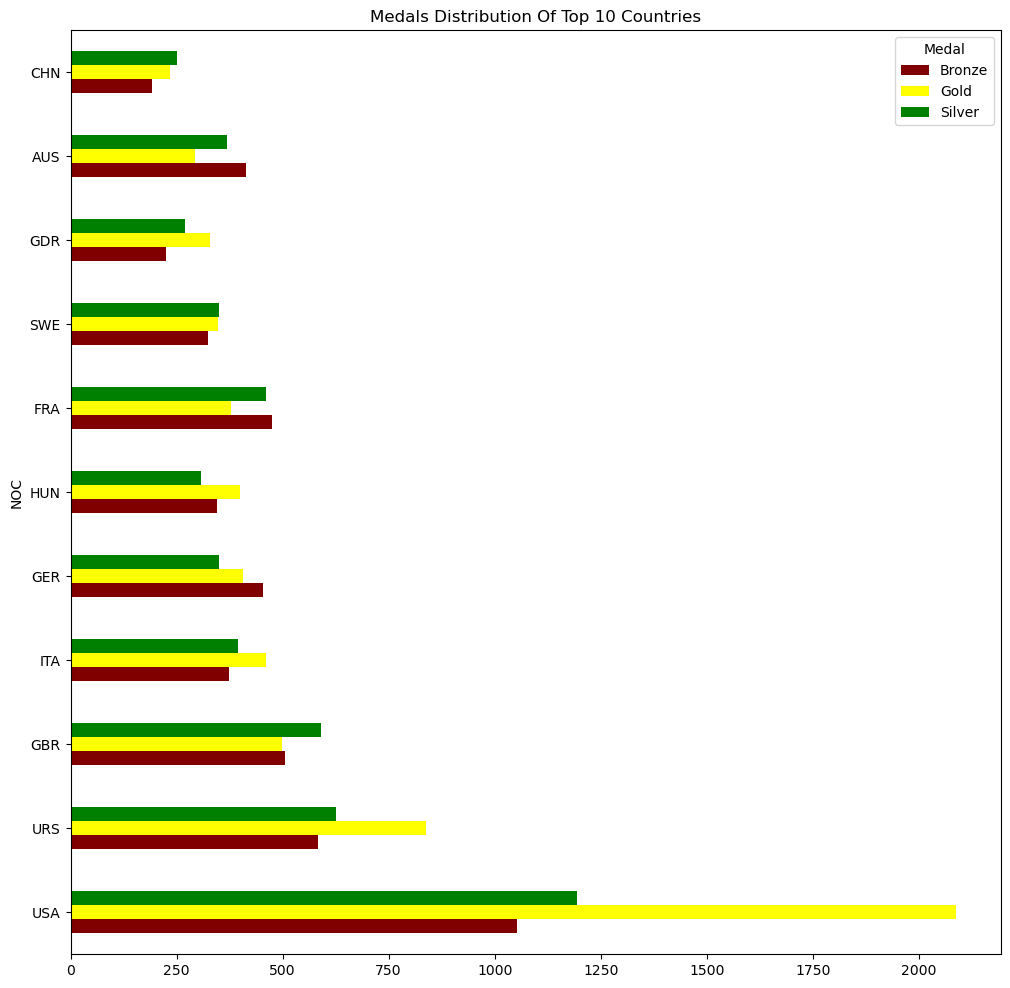

In [29]:
#Medal Distributions in countries
medals_country=olympics.groupby(['NOC','Medal'])['Gender'].count().reset_index().sort_values(by='Gender',ascending=False)
medals_country=medals_country.pivot('NOC','Medal','Gender').fillna(0)
top=medals_country.sort_values(by='Gold',ascending=False)[:11]
top.plot.barh(color=['maroon','yellow','Green'])
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.title('Medals Distribution Of Top 10 Countries')
plt.show()

In [39]:
olympics.Medal.value_counts()

Gold      9850
Bronze    9689
Silver    9677
Name: Medal, dtype: int64

#### Medals By Top 10 Countries in Top Sports

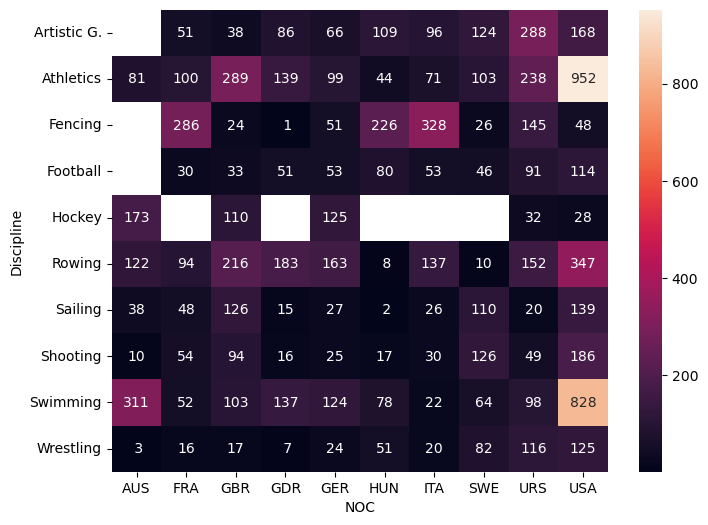

In [40]:
d.loc[d['Discipline'].str.contains('Wrestling'),'Discipline']='Wrestling'
d.loc[d['Discipline'].str.contains('Weightlifting'),'Discipline']='Weightlifting'
test=d[d['NOC'].isin(d['NOC'].value_counts()[:10].index)]
test=test[test['Discipline'].isin(d['Discipline'].value_counts()[:10].index)]
test=test.groupby(['NOC','Discipline'])['Sport'].count().reset_index()
test=test.pivot('Discipline','NOC','Sport')
sns.heatmap(test,annot=True,fmt='2.0f')
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()
